# Zadania

#### 1. (7.5 pkt) Wykonaj podzadania zdefiniowane w punktach a), b) i c) z wykorzystaniem bibliotek `numpy` i `matplotlib`


a) **(3 pkt)** Poniżej przedstawiono implementację funkcji `calculate`, w której zrealizowano zbiór operacji na dwóch dwuwymiarowych macierzach $a$ i $b$. Zmień implementację tej funkcji tak, aby pozbyć się wykorzystania pętli w tym celu wykorzystaj operacje zdefiniowane w bibliotece `numpy`. Zweryfikuj poprawność nowo zdefiowanej funkcji dla dowolnie wybranego zestawu parametrów.

```python
def calculate(
    a: np.ndarray, 
    b: np.ndarray,
    threshold: int = 5
) -> float:
'''Implements bunch of operations on matrices.'''
    # Check a and b dimensions
    assert a.shape == b.shape
    # Check whether array is 2D 
    assert len(a.shape) == 2

    rows = a.shape[0]
    cols = a.shape[1]
    b_sum = 0
    out = 0.0
    c = np.zeros(a.shape)

    for row_id in range(rows):
        for col_id in range(cols):
            if a[row_id][col_id] > threshold:
                c[row_id][col_id] = abs(
                    a[row_id][col_id] - b[row_id][col_id]
                )
            else:
                c[row_id][col_id] = 1

            b_sum += b[row_id][col_id]


    col_avgs = []
    for row_id in range(rows):
        col_sum = 0
        for col_id in range(cols):
            col_sum += c[row_id][col_id]

        col_avg = col_sum / cols
        out += (col_avg * 100) / b_sum  

    return out
```


In [220]:
# TUTAJ UMIEŚĆ KOD

b) **(2 pkt)** Dokonaj porównania czasów wykonania funkcji `calculate` i tej zaimplementowanego w punkcie 1. Wylosuj macierze wejściowe $a$ i $b$ z rozkładu dyskretnego jednostajnego z zakresu 0-10 oraz przyjmij wartość parametru `threshold` na 5. Obliczenia przeprowadź dla następujących wymiarów macierzy:

- 3x3
- 100x100
- 1000x1000
- 10000x1000


In [223]:
# TUTAJ UMIEŚĆ KOD I PORÓWNANIE

c) **(2.5 pkt)** Wykorzystując bibliotekę `matplotlib` narysuj wykres przyśpieszenia nowo zaimplementowanej funkcji w porównaniu do oryginalnej implementacji. Dobierz odpowiedni typ wykresu, podpisz etykiety osi i uzupełnij tytuł wykresu.

In [224]:
# TUTAJ UMIEŚĆ KOD I WYKRES

#### 2. (7.5 pkt) Wykonaj podzadania zdefiniowane w punktach a), b) i c) z wykorzystaniem bibliotek `pandas`, `matplotlib` i `sklearn`

a) **(0.5 pkt)** Używając biblioteki `sklearn` i poniższej definicji wczytaj zbiór danych `boston house-prices dataset` i przekształć go do postaci `DataFrame` z biblioteki `pandas`. Dodatkowo wyświetl 15 pierwszych rekordów.

```python
from sklearn.datasets import load_boston
dataset = load_boston()
```

In [225]:
# TUTAJ UMIEŚĆ KOD 

b) **(1 pkt)** Używając funkcji `apply` utwórz kolumnę $\text{HIGH_TAX}$, która sprawdza czy dla danego miasta stawka podatkowa (kolumna $\text{TAX}$)  jest większa od mediany stawki podatkowej wszystkich lokalizacji



In [226]:
# TUTAJ UMIEŚĆ KOD 

c) **(2 pkt)** Pogrupuj rekordy wg. kolumny $\text{HIGH_TAX}$ i wybierz 4 cechy ze zbioru danych w których najbardziej widać różnicę dla grup $\text{HIGH_TAX}$



In [228]:
# TUTAJ UMIEŚĆ KOD I WYPISZ WYBRANE CECHY

d) **(4 pkt)** Dla wybranych cech w punkcie `c)` porównaj wartości tych cech na wykresach. Dobierz odpowiedni typ wykresu (słupkowy, kołowy, liniowy, histogram). Wybór uzasadnij. Wykresy mają być umiejscowione w jednym wykresie z subplotem składającym się z 2 kolumn i dwóch rzędów. Wykresy powinny posiadać etykiety osi X i Y oraz legendę.


In [230]:
# TUTAJ UMIEŚĆ KOD I WYKRESY

# Rozwiązania 

Zad 1.

In [168]:
import pandas as pd
from sklearn.datasets import load_boston

df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [173]:
tax_median = df['TAX'].median()

In [174]:
df['HIGH_TAX'] = df.apply(
    lambda x: x['TAX'] > tax_median,
    axis=1
)

In [216]:
df.groupby('HIGH_TAX').mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
HIGH_TAX,,,,,,,,,,,,,
False,0.249547,15.966797,6.826953,0.078125,0.486659,6.476523,56.979687,4.740493,4.367188,273.519531,17.853125,387.590586,9.64418
True,7.058236,6.650000,15.550040,0.060000,0.624364,6.088140,80.448400,2.826902,14.856000,546.188000,19.072400,325.015480,15.73416


In [182]:
df_high = df[df.HIGH_TAX == True].reset_index()
df_low = df[df.HIGH_TAX == False].reset_index()

In [181]:
col = 'CRIM'

In [186]:
import matplotlib.pyplot as plt

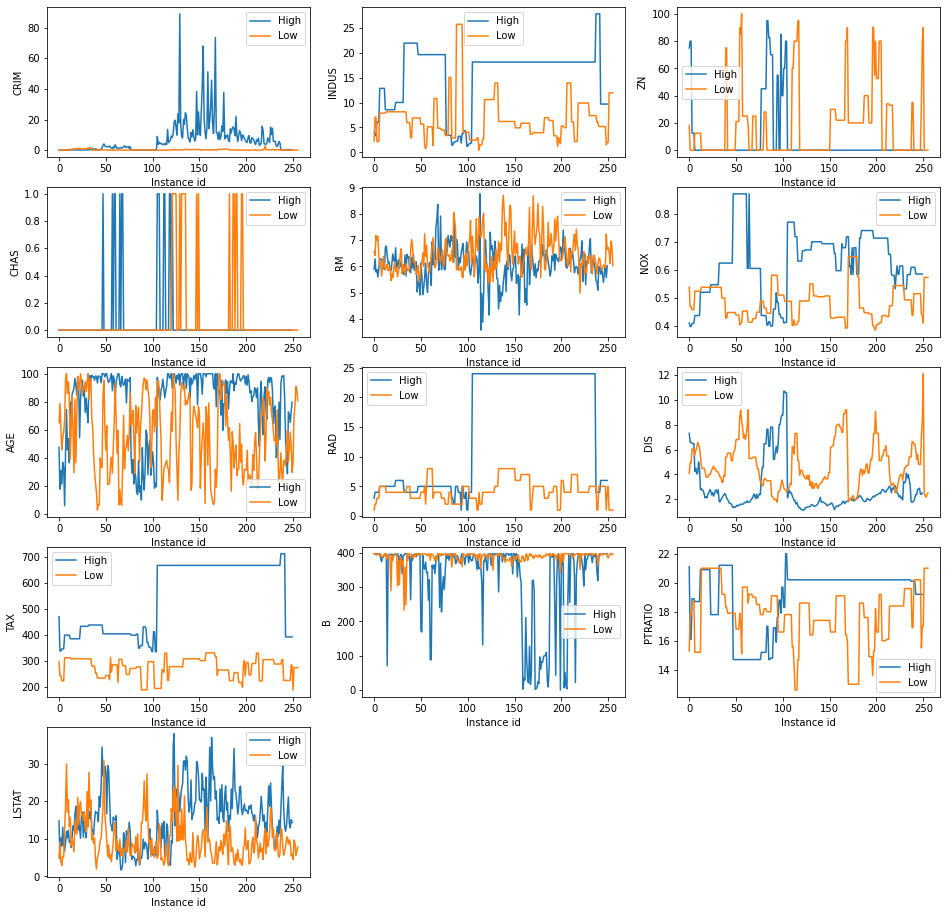

In [213]:
nrows=5
ncols=3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,16))
for column_id, column in enumerate(df.columns):
    if column == 'HIGH_TAX':
        continue
    ax_col_id = int(column_id / ncols)
    ax_row_id = (ax_col_id * ncols) - column_id
    ax = axs[ax_col_id][ax_row_id]
    
    ax.plot(df_high[column], label='High')
    ax.plot(df_low[column], label='Low')
    ax.legend()
    ax.set_ylabel(column)
    ax.set_xlabel('Instance id')


axs[-1][1].set_visible(False)
axs[-1][2].set_visible(False)

plt.show()

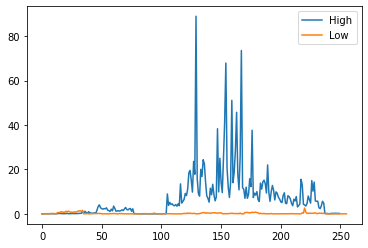

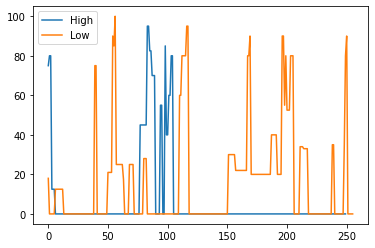

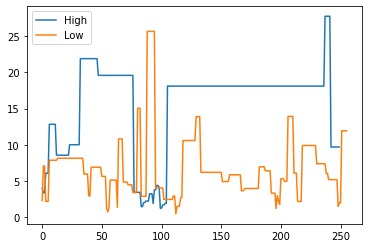

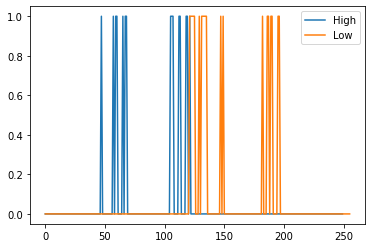

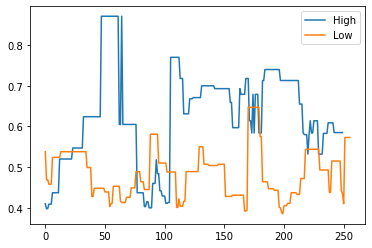

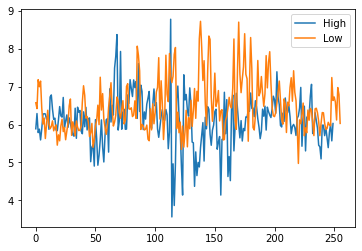

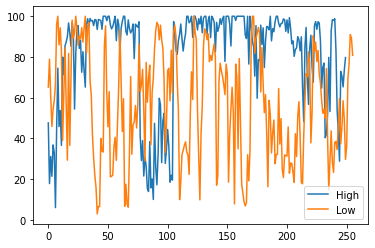

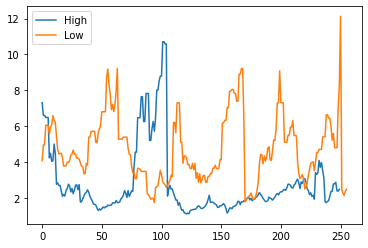

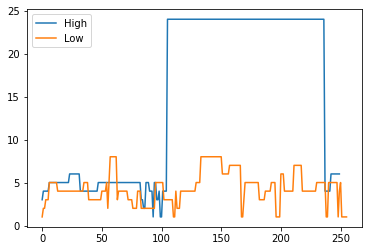

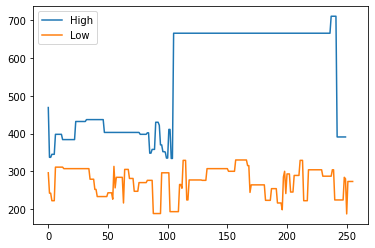

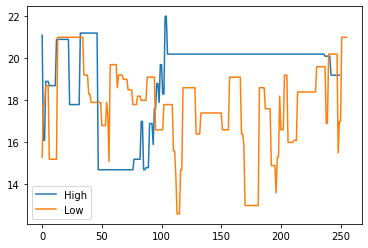

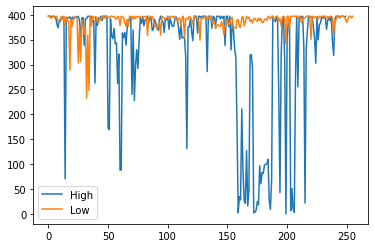

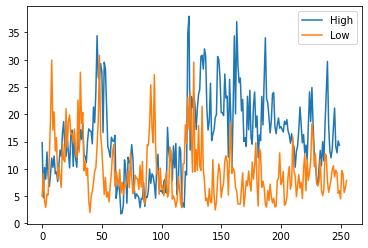

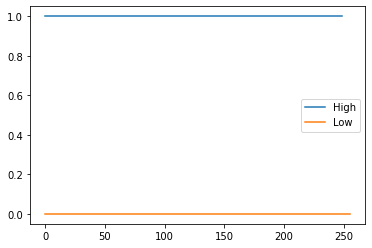

In [192]:
for column in df.columns:
    plt.plot(df_high[column], label='High')
    plt.plot(df_low[column], label='Low')
    plt.legend()
    plt.show()

HIGH_TAX
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: CRIM, dtype: object

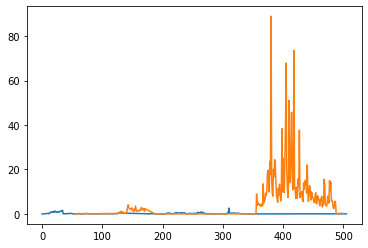

In [179]:
df.groupby('HIGH_TAX')['CRIM'].plot()

In [159]:
df[df.HIGH_TAX == False]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HIGH_TAX
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,False
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,False
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,False
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,False
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,False
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,False


Zad 1.

In [83]:
def dummy_fn_np(
    a: np.ndarray, 
    b: np.ndarray,
    threshold: int = 5
) -> float:
    '''Implements bunch of operations on matrices'''
    # Check a and b dimensions
    assert a.shape == b.shape

    c = np.zeros(a.shape)
    indices = a > threshold
    c[indices] = np.abs(a[indices] - b[indices])
    c[np.invert(indices)] = 1
    c_row_mean = np.mean(c, axis=1) * 100    
            
    return np.sum(c_row_mean / np.sum(b))

In [107]:
size = (10000, 1000)
a = np.random.randint(low=0, high=10, size=size)
b = np.random.randint(low=0, high=10, size=size)

In [109]:
%%timeit -n 1 -r 1 
dummy_fn(a,b)

18.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [108]:
%%timeit -n 1 -r 1 
dummy_fn_np(a,b)

320 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [111]:
18.7 / 0.320

58.4375

In [61]:
out

0.06171603102264804

In [59]:
%%timeit
dummy_fn(a,b)


2.39 s ± 63.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
size = (10000, 1000)
a = np.random.randint(low=0, high=100, size=size)
b = np.random.randint(low=0, high=100, size=size)
dummy_fn(a,b)
